# Univariate Linear Regression

##### Importing Numpy for mathematical operations, Pandas for dataframe, Matplotlib and Seaborn for data Visualisation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Checking for Null Values

In [2]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Visualising Data

<AxesSubplot:>

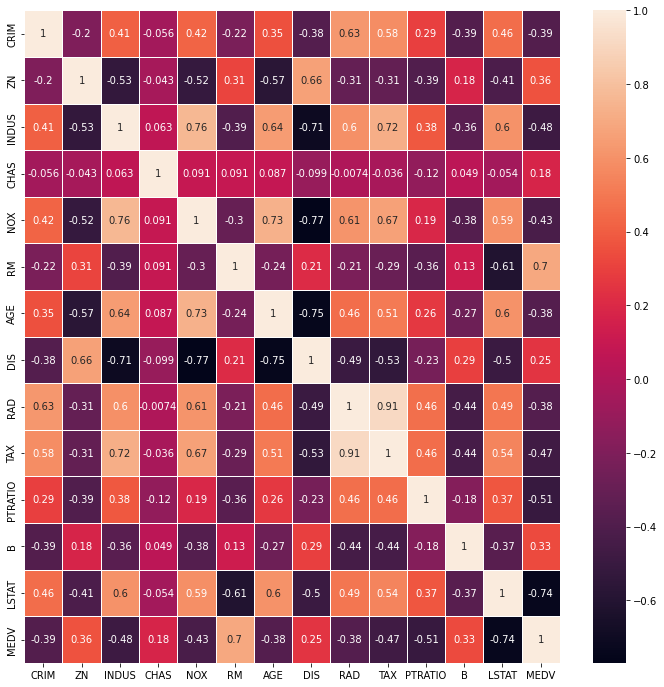

In [3]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,linewidths=1)

#### LSTAT vs MEDV Plot

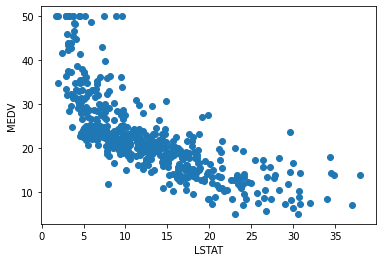

In [4]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.scatter(df.LSTAT,df.MEDV)

#### RM vs MEDV Plot

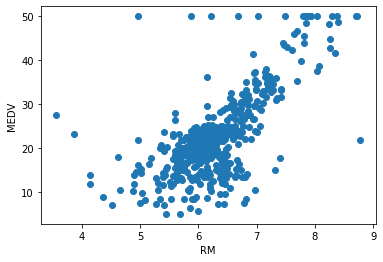

In [5]:
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(df.RM,df.MEDV)


## Removing Outliers from Training Data

In [6]:
max_threshold=df['RM'].quantile(0.95)
min_threshold=df['RM'].quantile(0.05)
df=df[(df['RM']>min_threshold) & (df['RM']<max_threshold)] #x is training data with removed outliers
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
#Extracting target variable
target=df.MEDV
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 454, dtype: float64

## Splitting Train and Test Data

In [8]:
train=df.iloc[:350,:]
test=df.iloc[350:,:]
tgt_test=target.iloc[350:]
tgt_train=target.iloc[:350]

In [9]:
x=df

# Building the Model

In [10]:
def model(X,Y,lr=0.0001,itr=1000):
    m=c=0
    n=len(X)
    cost_list= []
    for i in range (itr):
        h=m*X +c
        error=Y-h
        cost=(1/n)*sum(error**2)
        cost_list.append(cost)
        md=(-2/n)*np.sum((error)*X)
        cd=(-2/n)*np.sum(error)
        m=m-lr*md
        c=c-lr*cd
        print(cost)
     
    return m,c,cost_list
    

### Calling the model and receiving the parameters

In [11]:
m,c,cost_list=model(x.RM,x.MEDV)

524.0601541850219
516.2954745582334
508.65605198057887
501.1398658452532
493.7449281412407
486.4692829274804
479.31100581553443
472.26820346058133
465.33901306063865
458.5216018638515
451.81416668373083
445.2149334222205
438.72215660044884
432.3341188970517
426.04913069394627
419.86552962943216
413.7816801584952
407.7959731202133
401.90682531213747
396.1126790715346
390.4120018633888
384.80328587505494
379.2850476174369
373.8558275326139
368.5141896077878
363.2587209954625
358.0880316397475
353.00075390868864
347.99554223253625
343.07107274784414
338.22604294730786
333.45917133525626
328.7691970886985
324.15487972383704
319.614998767965
315.14835343665226
310.75376231614
306.43006305085936
302.1761120359926
297.9907841149884
293.87297228196473
289.8215873889042
285.83555785757807
281.9138293961172
278.05536472015183
274.25914327845396
270.5241609830023
266.8494299434038
263.23397820559825
259.6768494947792
256.17710296245957
252.73381293762142
249.3460686818763
246.0129741485773
242.73

42.74503330238883
42.74460145070376
42.744176277463225
42.74375767493334
42.74334553711803
42.742939759731435
42.74254024016963
42.742146877483954
42.74175957235441
42.741378227063024
42.741002745468215
42.7406330329793
42.740268996531626
42.73991054456161
42.739557586983075
42.73921003516273
42.73886780189725
42.738530801390155
42.73819894922871
42.73787216236224
42.73755035907961
42.73723345898785
42.736921382990836
42.736614053268546
42.73631139325624
42.73601332762419
42.73571978225797
42.73543068423875
42.73514596182395
42.734865544428445
42.73458936260558
42.734317348029094
42.73404943347501
42.733785552803596
42.73352564094223
42.73326963386802
42.73301746859075
42.73276908313659
42.732524416530914
42.732283408783424
42.732046000871065
42.73181213472312
42.73158175320552
42.731354800106104
42.73113122011934
42.73091095883178
42.73069396270786
42.73048017907577
42.73026955611318
42.73006204283383
42.72985758907387
42.729656145478856
42.729457663490315
42.72926209533321
42.7290693

###  Printing Parameters


#### Slope

In [12]:
print("slope parameter")
m

slope parameter


3.410725916661653

#### Intercept

In [13]:
print("intercept")
c

intercept


0.49843630496613883

## Prediction using test data

In [14]:
ypred=m*test.RM+c

# Calculating MSE

In [15]:
mse=(np.square(np.subtract(ypred,tgt_test))).mean()
mse

62.69464528254029

## Visualising Result

## Ploting Cost curve

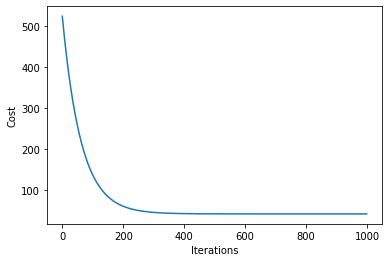

In [16]:
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(cost_list)

### Result :

### MSE from Univariate Linear Regression : 62.69